# Google Play Store Apps - Android market
Data of 10k Play Store apps - Direct link to the dataset [here](https://www.kaggle.com/lava18/google-play-store-apps)

*We take those 10k as a sample of a population for our analysis*


_____

### Goal

**If I would launch an App, what king of App should I go for if it is important to me to have +positives reviews?**

Sub questions to respond to get to my conclusion:
  - Is there a positive correlation between ratings and reviews?
  - Is there any statistical significance between reviews of Paid and Free Apps?
  - Is there any statistical significance between ratings of Paid and Free Apps?
  - Is there any statistical significance between the different ratings given from reviews of Paid and Free Apps?
 



### Steps
1. [Import Libraries](#Import_Libraries)

2. [Import Data](#Import_Data)

3. [Exploratory Data Analysis (EDA)](#EDA)
    - [Data wrangling](#Data_Wrangling)
       - [Explore data ](#Explore_Data)
       - [Clean data](#Clean_Data)
4. [Statistics](#Statistics)
    - Data visualization
    - Correlation of all numeric varibales
    - Explor correlation of interesting variables
        - Reviews <> Rating 
    - Hypothesis Testing
        - **Paid | Free <> reviews: 2samples t test** 
     *¿Is there any statistical significance between reviews of Paid and Free Apps?* 
        - **Paid | Free <> ratings: 2samples t test** 
     *¿Is there any statistical significance between ratings of Paid and Free Apps?*
        - **Paid | Free; Rating <> Reviews: Anova** 
     *¿Is there any statistical significance between the different ratings given from reviews of Paid and Free Apps?*

5. [Final Conclusion: "If I would launch an App, what king of App should I go for if it is important to me to have +positives reviews?"](#Final-Conclusion)




___

# Import_Libraries

In [1]:
import pandas as pd
import numpy as np

import time
import datetime

import math
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.model_selection import train_test_split

# Import_Data

In [2]:
playstore_raw= pd.read_csv("/Users/annavilardell/Desktop/BootcampData/PR04-project-statistical-analysis/PR04-project-statistical-analysis-Anna/GoogleData/googleplaystore.csv")                       

##### Metadata

- **App**= Application name
- **Category**= Category the app belongs to
- **Rating**= Overall user rating of the app (as when scraped)
- **Reviews**= Number of user reviews for the app (as when scraped)
- **Size**= Size of the app (as when scraped)
- **Installs**= Number of user downloads/installs for the app (as when scraped)
- **Type**= Paid or Free
- **Price**= Price of the app (as when scraped)
- **Content Rating**= Age group the app is targeted at - Children / Mature 21+ / Adult
- **Genres**= An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to


# EDA

## Data_Wrangling

### Explore_Data

In [3]:
playstore_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Check column names
playstore_raw.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
# Check length dataset
len(playstore_raw)

10841

In [6]:
# Check info columns
playstore_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# Check shape dataframe
playstore_raw.shape

(10841, 13)

### Clean_Data

##### Delete Duplicates

In [8]:
# Check existing duplicates
playstore_raw.duplicated().value_counts()

False    10358
True       483
dtype: int64

In [9]:
# Delete duplicates
playstore_raw=playstore_raw.drop_duplicates()

In [10]:
# Check all duplicates are out of our dataset
playstore_raw.shape

(10358, 13)

##### Delete|Substitute NaNs

#### 1. Check total number of NaNs

In [11]:
playstore_raw.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### 2. Clean NaNs from columns: Rating, Type, Content Rating, Current Ver and Android Ver

#### 2.1 NaNs from columns Rating

In [12]:
# We see that there are 1474 App without rating, but that they do have a review. 
# We will then fill Nan values taking into account the reviews
playstore_raw[playstore_raw["Rating"].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [13]:
# Check column "Rating" & "Reviews" to make sure we can play with them
# we fist check dtyoes of both columns

In [14]:
# dtyoes "Rating"
playstore_raw.Rating.dtype

dtype('float64')

In [15]:
# dtyoes "Reviews"
playstore_raw.Reviews.dtype

dtype('O')

In [16]:
# dtype('O') -> means there are some errors but they are not stated as NaN
# So we convert them to NaN values so later we can work with them
playstore_raw["Reviews"] = playstore_raw["Reviews"].apply(pd.to_numeric, errors='coerce')

In [17]:
# Check dtype "Reviews" to make sure we are good to go
playstore_raw.Reviews.dtype

dtype('float64')

In [18]:
# To conitnue, in order to substitute NaNs from column "Rating" we will: 
# 1)See the relation between "Rating" and "Reviews" & 
# 2)Substitue Nan values for a proper rating value

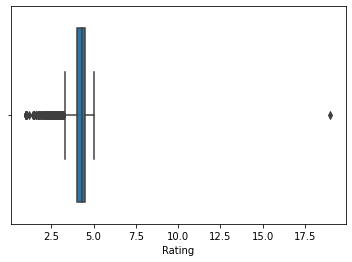

In [19]:
# To be able to analyse the correlation between variables we would first check the outliers
# we use boxplot to visualice if we have any outliers
sns.boxplot(x='Rating', data=playstore_raw);

In [20]:
# The rating should go from 0-5 otherwise we would consider it an outlier for now. The rest we'll see later
playstore_raw[(playstore_raw["Rating"]<0) | (playstore_raw["Rating"]>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [21]:
# We see that we have 1 outlier that can be an error of 1.9 or that someone wanted to give an extraodinary grade - we don't know
# Also we see that other columns have NaN values, so we decided to drop this row
playstore_raw.drop(playstore_raw[(playstore_raw["Rating"]<0) | (playstore_raw["Rating"]>5)].index, inplace=True)                                 
                                        

In [22]:
# Check we don't have the outlier
playstore_raw[(playstore_raw["Rating"]<0) | (playstore_raw["Rating"]>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [23]:
# Now we can continue and see the correlation between "Rating" & "Reviews"

In [24]:
# We check if +reviews mean higer rating
pd.pivot_table(playstore_raw,index=["Rating"], values=['Reviews'], aggfunc=["max","min","mean"])

,max,min,mean
,Reviews,Reviews,Reviews
Rating,,,
1.0,5.0,1.0,1.750000e+00
1.2,44.0,44.0,4.400000e+01
1.4,45.0,20.0,3.266667e+01
1.5,57.0,2.0,2.033333e+01
1.6,402.0,8.0,1.727500e+02
1.7,1172.0,6.0,2.950000e+02
1.8,3270.0,5.0,4.272500e+02
1.9,954.0,8.0,2.356667e+02


In [25]:
# We clearly see that +reviews wont mean higer rating
# In this case I will replace the NaNs for the mean
# To do so I will make check if mean, median, mode are similar

mean= playstore_raw["Rating"].mean()  # arithmetic average of our data
median= playstore_raw["Rating"].median() # middle number in our data
mode= playstore_raw["Rating"].mode() # most frequently occuring observation data

print(round(mean,2)) 
print(round(median,2)) 
print(round(mode,2)) 

4.19
4.3
0    4.4
dtype: float64


In [26]:
# As above mean, median, mode are similar we will proceed and eplace the NaNs for the mean
playstore_raw.Rating[playstore_raw["Rating"].isnull()==True]=mean

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# Check we don't have NaN values in column "Rating"
playstore_raw.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

#### 2.2. NaNs from column Type

In [28]:
# Check NaNs "Current Ver"
playstore_raw[playstore_raw["Type"].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.187877,0.0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [29]:
# We substitute NaN per Free as we see that Price is 0
playstore_raw.Type[playstore_raw["Type"].isnull()==True]="Free"

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# Check we don't have NaN values in column "Rating"
playstore_raw.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

#### 2.3. NaNs from column Current Ver

In [31]:
# Check NaNs "Current Ver"
playstore_raw[playstore_raw["Current Ver"].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55.0,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145.0,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010.0,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.187877,0.0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179.0,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.187877,44.0,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.187877,1.0,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.187877,8.0,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [32]:
playstore_raw["Current Ver"].value_counts()

Varies with device    1302
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
5.800.04                 1
8.2.9                    1
2.0.24                   1
5.6.5                    1
4.2.8                    1
Name: Current Ver, Length: 2831, dtype: int64

In [33]:
# We wont substitue Nan values for now as I don't think I use this column.
# But, we won't remove this column yet as it might help as below with the "Android Ver"

#### 2.4 NaNs from column  Android Ver

In [34]:
# Check NaNs "Current Ver"
playstore_raw[playstore_raw["Android Ver"].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [35]:
playstore_raw["Android Ver"].value_counts()

4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
5.0 - 7.1.1              1
2.2 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [36]:
# We would manually subtitute both Nans value for a similar "Current Version"
playstore_raw.loc[4453,["Android Ver"]]="4.4 and up"
playstore_raw.loc[4490,["Android Ver"]]="1.0 and up"

In [37]:
# Check we don't have NaN values in any column accept "Current Ver" as commented before
playstore_raw.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

### Clean_Columns

In [38]:
# Columns View
playstore_raw.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [39]:
# Dataset General View
playstore_raw.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


#### 1. Clean Column App

In [40]:
# Check unique values equal length
playstore_raw.App.nunique()==len(playstore_raw.App)

False

In [41]:
# As we see we have App with the same name so we check which names are repeating 
playstore_raw.App.value_counts()

ROBLOX                        9
8 Ball Pool                   7
Bubble Shooter                6
Zombie Catchers               6
Helix Jump                    6
                             ..
J. Cole Albums (2007-2017)    1
AF-STROKE (FREE)              1
EF Coach                      1
Mircules DX Cluster Lite      1
V.360° Camera                 1
Name: App, Length: 9659, dtype: int64

In [42]:
# We check those App names repeated to see what would be the reason
# We start by checking: playstore_raw["App"]=="ROBLOX"
playstore_raw[playstore_raw["App"]=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407.0,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [43]:
# As we see above we have duplicates although num of Reviews are slightly different.
# We decide to eliminate "duplicated" rows
playstore_raw=playstore_raw.drop_duplicates("App")

In [44]:
# Check we have no more dupplicate App names
playstore_raw.App.value_counts()

Bu Hangi Firma?                     1
My Photo Keyboard                   1
Facebook Face to Face Events        1
Clover Dating App                   1
Keyboard - wallpapers , photos      1
                                   ..
Sci Fi Sounds                       1
UFC                                 1
14thStreetVet                       1
OvuView: Ovulation and Fertility    1
V.360° Camera                       1
Name: App, Length: 9659, dtype: int64

#### 2. Clean Column Category

In [45]:
# Check Column Category values
playstore_raw.Category.value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [46]:
# No need to make any change - all data is homogeneous 

#### 3. Clean Column Rating

In [47]:
playstore_raw.Rating.value_counts()

4.187877    1463
4.300000     897
4.400000     895
4.500000     848
4.200000     810
4.600000     683
4.100000     621
4.000000     513
4.700000     442
3.900000     359
3.800000     286
5.000000     271
3.700000     224
4.800000     221
3.600000     167
3.500000     156
3.400000     126
3.300000     100
4.900000      85
3.000000      81
3.100000      69
3.200000      63
2.900000      45
2.800000      40
2.600000      24
2.700000      23
2.300000      20
2.500000      20
2.400000      19
1.000000      16
2.200000      14
2.000000      12
1.900000      11
1.800000       8
1.700000       8
2.100000       8
1.600000       4
1.500000       3
1.400000       3
1.200000       1
Name: Rating, dtype: int64

In [48]:
# We simplify data by rounding rating value to and have a int number

In [49]:
# This round_half_up function will help us to round up/down the rating of each review so we don't have float numbers
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

In [50]:
# We give to "Rating" column the clean values
playstore_raw.Rating=[int(round_half_up(x)) for x in playstore_raw.Rating]

In [51]:
# Check "Rating" is now a int number
playstore_raw.Rating

0        4
1        4
2        5
3        5
4        4
        ..
10836    5
10837    5
10838    4
10839    5
10840    5
Name: Rating, Length: 9659, dtype: int64

#### 4. Clean Column Reviews

In [52]:
playstore_raw.Reviews

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 9659, dtype: float64

In [53]:
# We simplify data by rounding rating value to and have a int number as we can't have a review and a half
playstore_raw.Reviews=[int(x) for x in playstore_raw.Reviews]

In [54]:
# Check "Rating" is now a int number
playstore_raw.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 9659, dtype: int64

#### 5. Clean Column Size

In [55]:
# Check Column Category values
playstore_raw.Size.value_counts()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
82k                      1
720k                     1
898k                     1
253k                     1
872k                     1
Name: Size, Length: 461, dtype: int64

In [56]:
# We will convert MB to KM knowing thath 1MB=1000KB 
playstore_raw.Size=playstore_raw.Size.str.replace("M","").str.replace("k","000")

In [57]:
# Check "Rating" is now a int number
playstore_raw.Size.value_counts()

Varies with device    1227
11                     182
12                     181
13                     177
14                     177
                      ... 
222000                   1
292000                   1
562000                   1
716000                   1
887000                   1
Name: Size, Length: 461, dtype: int64

In [58]:
# We will for now leave the rows="Varies with device" and will comeback later if necessary.

#### 6. Clean Column Installs

In [59]:
# Check Column Category Installs
playstore_raw.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9659, dtype: object

In [60]:
# We will remove "+" and leave in title that the value of Installs is the minimun
playstore_raw.Installs=playstore_raw.Installs.str.replace("+","")

In [61]:
# Check "Rating" is now a int number
playstore_raw.Installs

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 9659, dtype: object

In [62]:
# We see above that we stil have a string/object 
type(playstore_raw.Installs[0])

str

In [63]:
# We remove "," from numbers
playstore_raw.Installs=playstore_raw.Installs.str.replace(",","")

In [64]:
# Check "Rating" is now a int number
playstore_raw.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9659, dtype: object

In [65]:
# Convert to int as they are num
playstore_raw.Installs = [int(x) for x in playstore_raw.Installs]

In [66]:
playstore_raw.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9659, dtype: int64

#### 7. Clean Column Type

In [67]:
# Check Column Category values
playstore_raw.Type.value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

In [68]:
# Column clean already

#### 8. Clean Column Price

In [69]:
# Check Column Category Price
playstore_raw.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [70]:
# We remove "$" from numbers
playstore_raw.Price=playstore_raw.Price.str.replace("$","")

In [71]:
# Check Column Category Price
playstore_raw.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [72]:
# Conver to dtype=float
playstore_raw.Price = [float(x) for x in playstore_raw.Price]

#### 9. Clean Column Content Rating

In [73]:
# Check Column Category Rating
playstore_raw["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [74]:
# Column clean already

#### 10. Clean Column Genres

In [75]:
# Check Column Category Genres
playstore_raw.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

#### 11. Clean Column Last Updated

In [76]:
# Check Column Last Updated
playstore_raw["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [77]:
# Split day, month and year
playstore_raw["Last Updated"]= playstore_raw["Last Updated"].str.replace(","," ")
playstore_raw["Last Updated"]= playstore_raw["Last Updated"].str.split(" ")

# Create new columns with day, month and year
playstore_raw["Last Updated Day"]= [i[1] for i in playstore_raw["Last Updated"]]
playstore_raw["Last Updated Month"]= [i[0] for i in playstore_raw["Last Updated"]]
playstore_raw["Last Updated Year"]= [i[3] for i in playstore_raw["Last Updated"]]

In [78]:
# Change month name to number
def Month_Name_to_Number(x):
    m = {
        'January': 1,
        'February': 2,
        'March': 3,
        'April':4,
         'May':5,
         'June':6,
         'July':7,
         'August':8,
         'September':9,
         'October':10,
         'November':11,
         'December':12
        }
    n = x.strip()
    out = m[n]
    return out

In [79]:
playstore_raw["Last Updated Month"]=playstore_raw["Last Updated Month"].apply(Month_Name_to_Number)


#### 12. Clean Column Current Ver

In [80]:
# Check Column Current Ver
playstore_raw["Current Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [81]:
# So far we would leave this column as we yet didn't delete nor substitue NaN values
# We don't think we're gonna use this column as we have already Android Ver and information giving is similar

#### 13. Clean Column Android Ver

In [82]:
# Check Column Android Ver
playstore_raw["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '1.0 and up', '5.0 - 6.0', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [83]:
# We can clean some values (having W)
playstore_raw["Android Ver"]=playstore_raw["Android Ver"].str.replace("W","")

In [84]:
# Check clean Category Genres
playstore_raw["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1',
       '1.0 and up', '5.0 - 6.0', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [85]:
# We're also going to keep only the Android version of when the app was launch. Ex: get 4.0.3 form 4.0.3 and up
playstore_raw["Android Ver"]=playstore_raw["Android Ver"].str.split(" ")
playstore_raw["Android Ver"]=[x[0] for x in playstore_raw["Android Ver"]]

In [86]:
# Check clean Category Genres
playstore_raw["Android Ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1',
       '4.3', '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1', '1.0'],
      dtype=object)

#### Remove extra Columns 

In [87]:
# Finally we remove column "Current Ver" as will no longer be usefull
playstore_raw.drop(columns=["Current Ver"], inplace=True)

# Also we remove column "Last Updated"
playstore_raw.drop(columns=["Last Updated"], inplace=True)

### Save_clean_data

In [88]:
#Save clean data to csv
playstore_raw.to_csv("playstore_clean.csv")

In [89]:
playstore_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Last Updated Day,Last Updated Month,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19,10000,Free,0.0,Everyone,Art & Design,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,4,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,5,215644,25,50000000,Free,0.0,Teen,Art & Design,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4,20,6,2018


# Statistics
       
- Data visualization
        
- Correlation of all numeric varibales
        
- Explor correlation of interesting variables
    - Reviews <> Rating (independent varibales)
            
- Hypothesis Testing
    - **Paid | Free <> reviews: 2samples t test** 
     *¿Is there any statistical significance between reviews of Paid and Free Apps?* 
    - **Paid | Free <> ratings: 2samples t test** 
     *¿Is there any statistical significance between ratings of Paid and Free Apps?*
    - **Paid | Free; Rating <> Reviews: Anova** 
     *¿Is there any statistical significance between the different ratings given from reviews of Paid and Free Apps?*
     
           
           
           
           

### 1. Read Data

In [90]:
# Read clean csv
playstore_clean= pd.read_csv("playstore_clean.csv")

In [91]:
playstore_clean.head(3)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Last Updated Day,Last Updated Month,Last Updated Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19,10000,Free,0.0,Everyone,Art & Design,4.0.3,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,4,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4.0.3,1,8,2018


In [92]:
# Remove column "Unnamed: 0" as it is a duplicated index
playstore_clean.drop(columns=["Unnamed: 0"], inplace=True)

In [93]:
playstore_clean.describe()

,Rating,Reviews,Installs,Price,Last Updated Day,Last Updated Month,Last Updated Year
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000,9659.000000,9659.000000,9659.000000
mean,4.174449,2.165926e+05,7.777507e+06,1.099299,15.632985,6.364013,2017.345688
std,0.598114,1.831320e+06,5.375828e+07,16.852152,9.431017,2.659610,1.137600
min,1.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,2010.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,7.000000,5.000000,2017.000000
50%,4.000000,9.670000e+02,1.000000e+05,0.000000,16.000000,7.000000,2018.000000
75%,5.000000,2.940100e+04,1.000000e+06,0.000000,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,31.000000,12.000000,2018.000000


In [94]:
playstore_clean.shape

(9659, 14)

### 2. Data Visualization

#### Installs by Type 

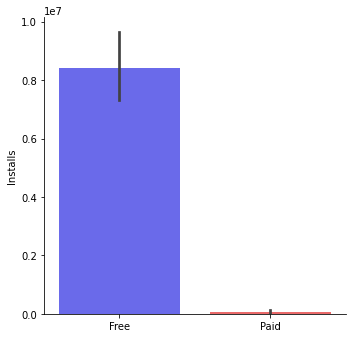

In [95]:
g = sns.catplot(
    data=playstore_clean, kind="bar",
    x="Type", y="Installs",palette="seismic")

g.set_axis_labels("", "Installs");

*Observations*:
- Majority of Installs are from Free Apps. 

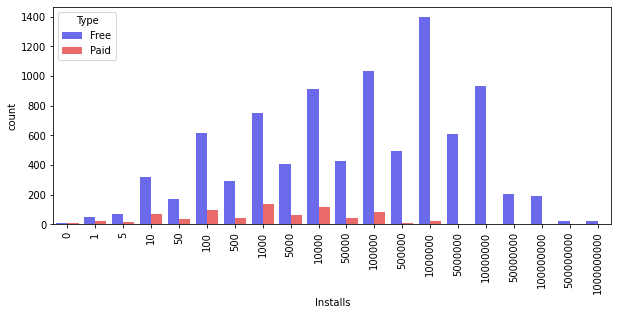

In [96]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(10,4))
g= sns.countplot("Installs", data=playstore_clean, hue="Type", palette="seismic", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

*Observations*:
- Majority of Installs are from Free Apps. 
- Max of intallsments of Paid apps id 100000 vs 1000000000

#### Rating by Type 

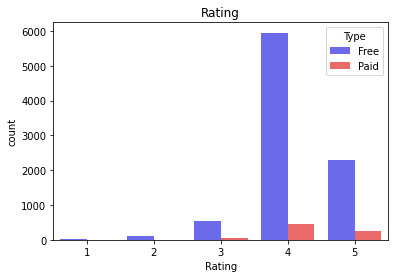

In [97]:
rating_g= sns.countplot("Rating", data=playstore_clean, hue="Type", palette="seismic")

rating_g.set_title("Rating");

*Observations*:
- Majority of Rating are between 4-5. 
- Free app are more evaluated with a 4 and Paid Apps have a more distributed rating among 3,4 and 5.

#### Category x Type

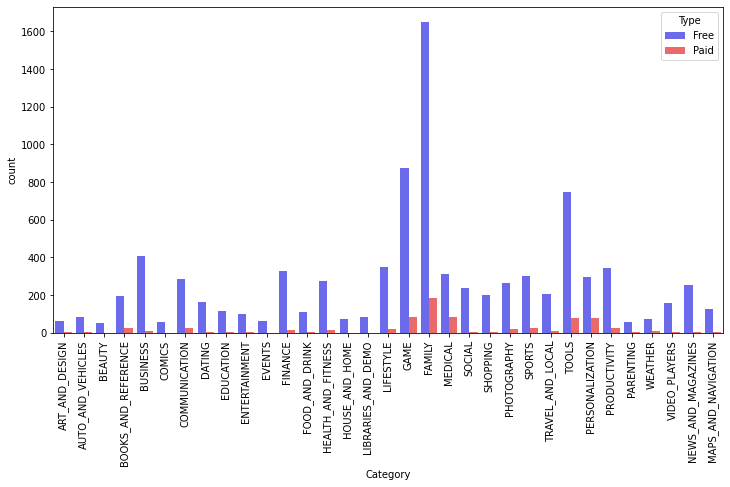

In [98]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g= sns.countplot("Category", data=playstore_clean, hue="Type", palette="seismic", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

*Observations*:
- The Category with more apps in the market is Family, then Games and Tools
- Overall we have more Free than Paid Apps

#### Rating / Price / Reviews / installs   x   Categoy by Type

In [99]:
# Create groupby "Category" & "Type"
playstore_clean_ByCategory=playstore_clean.groupby(["Category","Type"])

# Separate "Category" by numeric variables
rating_ByCategory= playstore_clean_ByCategory["Rating"].agg(np.mean).sort_values(ascending=False)
price_ByCategory= playstore_clean_ByCategory["Price"].agg(np.mean).sort_values(ascending=False)
reviews_ByCategory= playstore_clean_ByCategory["Reviews"].agg(np.mean).sort_values(ascending=False)
installs_ByCategory= playstore_clean_ByCategory["Installs"].agg(np.mean).sort_values(ascending=False)

# Print Top3
print("Rating x Category: \n",rating_ByCategory.head(10), "\n")
print("Price x Category: \n",price_ByCategory.head(10), "\n")
print("Reviwes x Category: \n",reviews_ByCategory.head(10), "\n")
print("Installs x Category: \n",installs_ByCategory.head(10), "\n")

Rating x Category: 
 Category            Type
ART_AND_DESIGN      Paid    5.000000
EDUCATION           Paid    5.000000
ENTERTAINMENT       Paid    5.000000
NEWS_AND_MAGAZINES  Paid    5.000000
WEATHER             Paid    4.625000
FOOD_AND_DRINK      Paid    4.500000
SHOPPING            Paid    4.500000
GAME                Paid    4.439024
LIFESTYLE           Paid    4.421053
PERSONALIZATION     Paid    4.382716
Name: Rating, dtype: float64 

Price x Category: 
 Category             Type
FINANCE              Paid    170.637059
LIFESTYLE            Paid    124.256316
EVENTS               Paid    109.990000
BUSINESS             Paid     14.607500
FAMILY               Paid     13.113989
MEDICAL              Paid     11.996386
PRODUCTIVITY         Paid      8.961786
PHOTOGRAPHY          Paid      6.225263
MAPS_AND_NAVIGATION  Paid      5.390000
SOCIAL               Paid      5.323333
Name: Price, dtype: float64 

Reviwes x Category: 
 Category         Type
COMMUNICATION    Free    992108.1

##### First conclusions - Interpretation

- **Rating x Category:**
    The highest ratings are given to Paid App

- **Price x Category:**
    The most expensive app are from finance, family and lifestyle categories

- **Reviwes x Category:**
    Free Apps have more reviews 
    
- **Installs x Category:**
    Free App have more more installs 



- Games Apps are the ones with +reviews & +installments that have a rating above 4.
- Communication is the App with +reviews & +installments

#### Games Genres

In [100]:
reviews_games=playstore_clean[playstore_clean["Category"]=="GAME"]

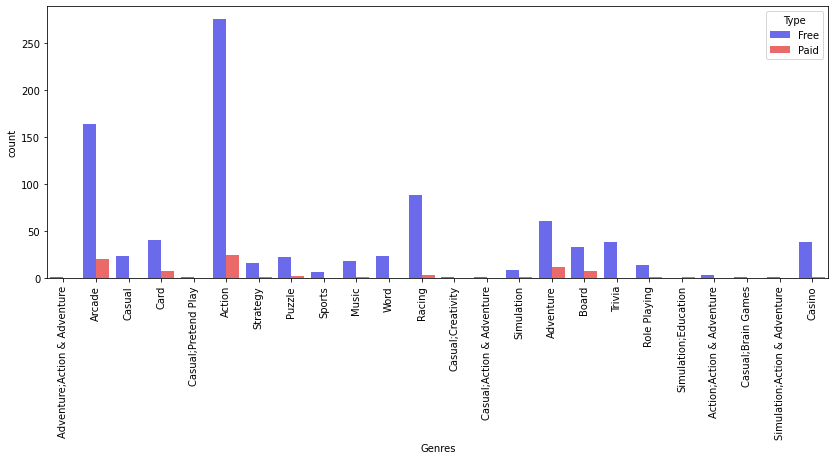

In [101]:
fig_dims = (14, 5)
fig, ax = plt.subplots(figsize=fig_dims)
g= sns.countplot("Genres", data=reviews_games, hue="Type", palette="seismic", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

*Observations*:
- In the Game category, the most popular Genres are Action & Arcade.
- Overall we have more rating from Free Apps than Paid

#### Games Rating

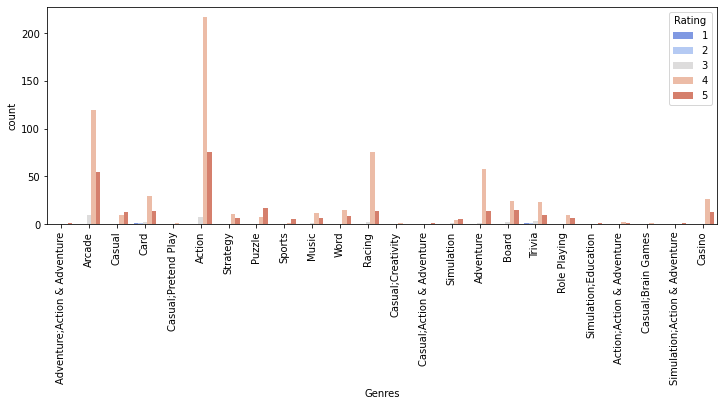

In [104]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
g= sns.countplot("Genres", data=reviews_games, hue="Rating", palette="coolwarm", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

*Observations*:
- In the Game category, the best rated Genres are game action on the first placethen arcade and racing.
- Overall the Game Catergoy is rated between 4 & 5.

#### Games Content Rating

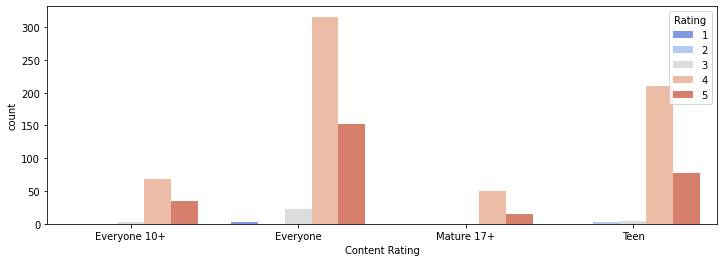

In [105]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
g= sns.countplot("Content Rating", data=reviews_games, hue="Rating", palette="coolwarm", ax=ax)
g.set_xticklabels(g.get_xticklabels());

*Observations*:
- In the Game category, all groups are targeted.
- Overall the Game Catergoy is rated between 4 & 5.

#### Correlation num variables

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


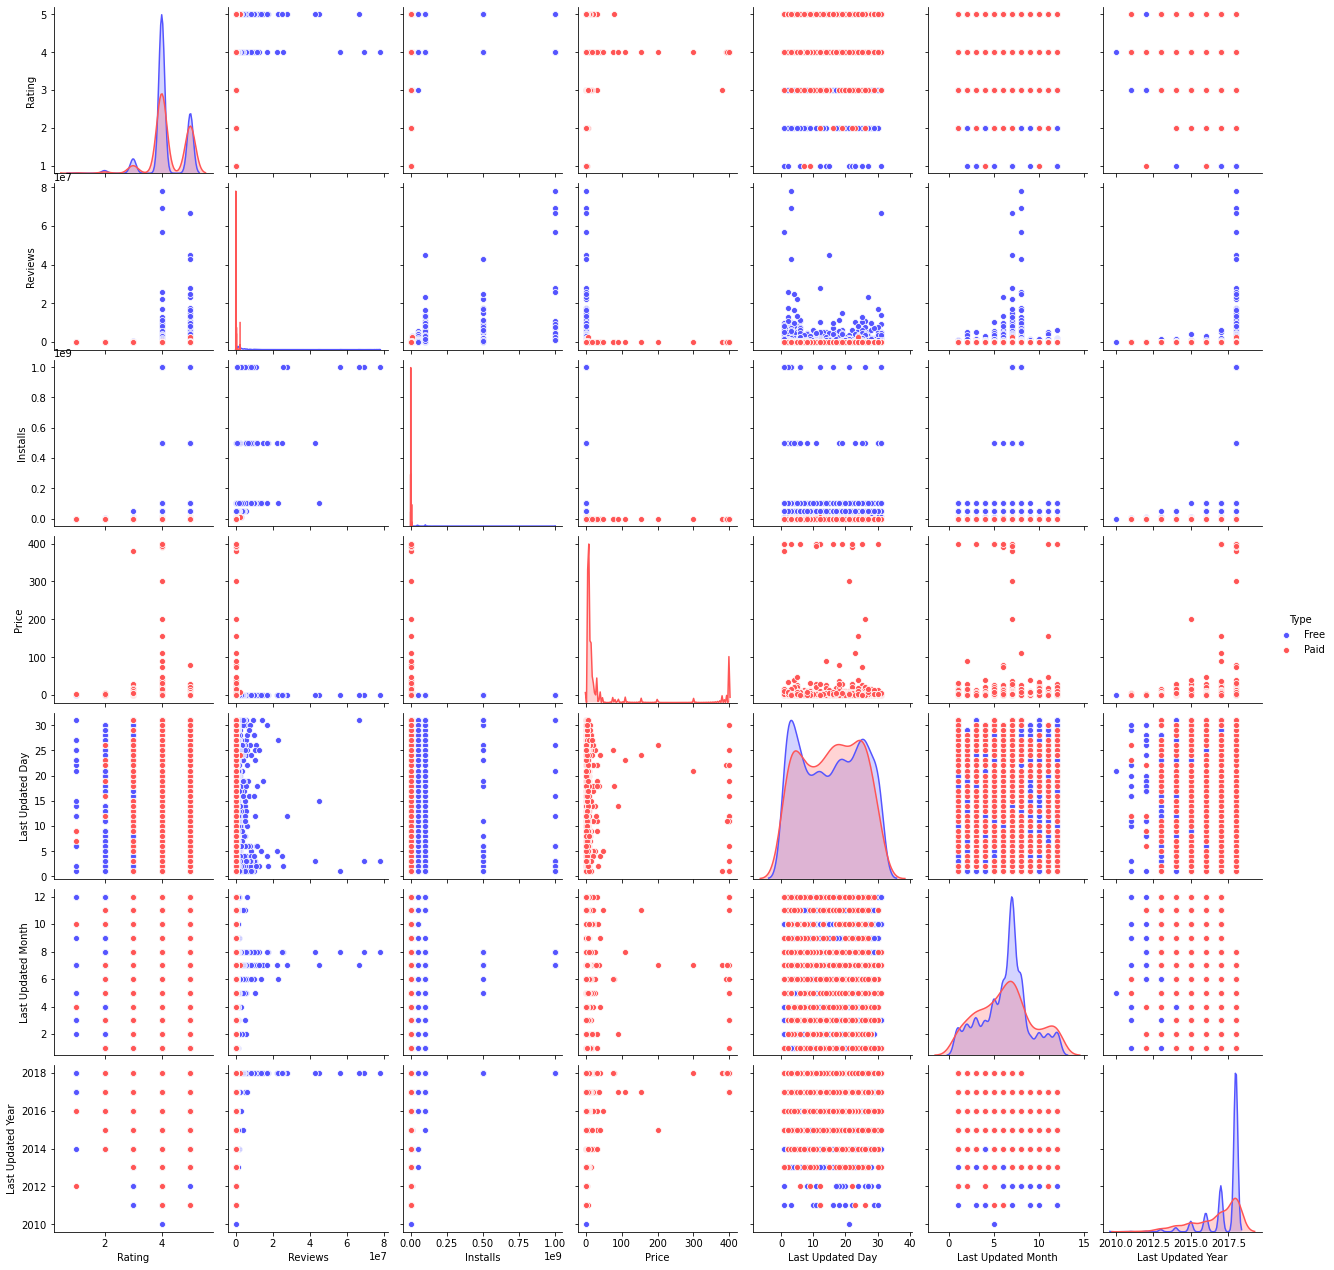

In [110]:
# We use pairplot to check correlations
# We've tried to "hue" by diferent groups and finally we see that the most obvious is Type(Paid|Free)
sns.pairplot(playstore_clean, hue="Type", palette="seismic");

In [111]:
# We see that something is wrong and that are the different data dimensions we have.
# We should change them to log for some of them.
# For other variables' correlation (Last updated) the pairplot wont have use, 
# we will later analyzed it with other graph to take conclusion.

In [112]:
indices=playstore_clean.drop(columns="Price")[(playstore_clean.drop(columns="Price")!=0).all(1)].index

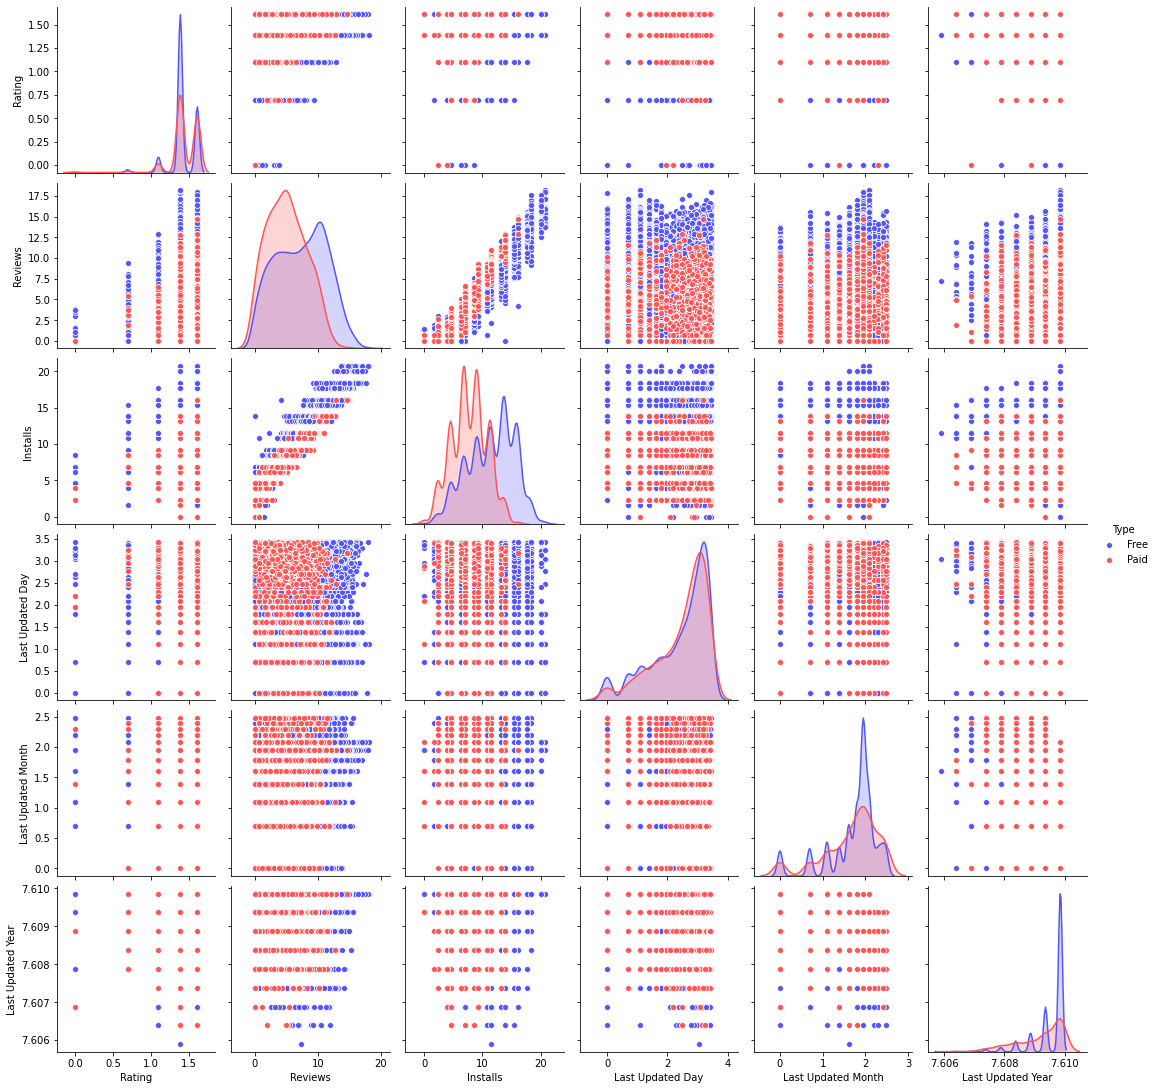

In [113]:
pair_plot=playstore_clean.select_dtypes(include='number').drop(columns="Price").loc[indices].applymap(np.log)

pair_plot["Type"]=playstore_clean["Type"].loc[indices]

sns.pairplot(pair_plot, hue="Type", palette="seismic");

##### Second conclusions - Interpretation

- **Correlation Rating <> Reviews:**
    - Independent varibales
    - Paid: Seems to have a positive correlation staring with high rating from almost 1st install
    - Free: Seems to have a week positive correlation

- **Correlation Installs <> Reviews:**
    - Dependent varibales
    - Paid & Free: Have a positive correlation   

- **Correlation Rating <> Installs:**
    - Independent varibales
    - Paid: seems to have a low positive correlation
    - Free:  seems to have a positive correlation as we see that +installs better rating
    

###### Outliers Rating x type

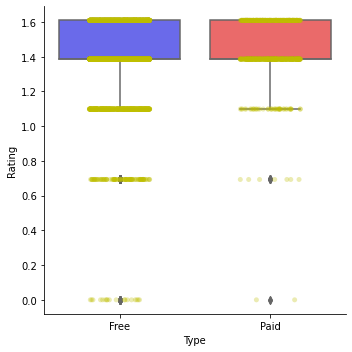

In [115]:
# We use sns.catplot to see if there are any outliers betwee categoric variable "type" and numeric "Rating".
sns.catplot(x="Type",y="Rating", data=pair_plot, kind="box", palette="seismic");

# add data points to boxplot with stripplot
sns.stripplot(x='Type', y='Rating', data=pair_plot, alpha=0.3,jitter=0.2,color='y');

##### Interpretation

- We have outliers in our variable rating but we decide not to remove them as for our analysis are interesting all highs and lows.

#### Explor correlation of interesting variables

#### Rating <> Reviews (Free&Paid)

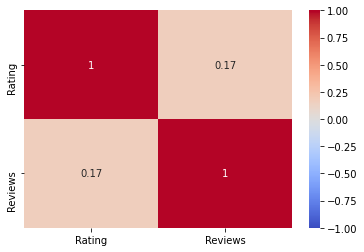

In [116]:
sns.heatmap(pair_plot[["Rating","Reviews"]].corr(),cmap="coolwarm",annot=True, vmin=-1, vmax=1);

###### Interpretation:
- Surprisingly, the correlation between Rating & Reviews is weak, almost not existing. Also we can visualize it in our graph above. So having more reviews doesn't mean higher rating.
     

#### Rating <> Reviews (Free&Paid separately)

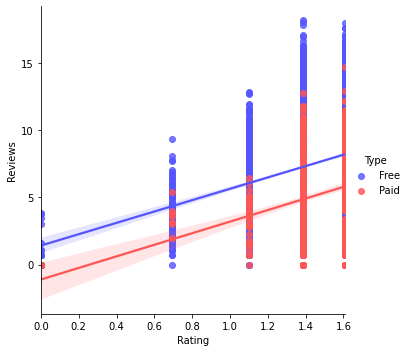

In [117]:
sns.lmplot(x="Rating", y="Reviews", hue="Type", data=pair_plot, fit_reg=True, palette="seismic")

In [123]:
# Create dataset with only Paid and another with Free App Type
pair_plot_free=pair_plot[pair_plot["Type"]=="Free"]
pair_plot_paid=pair_plot[pair_plot["Type"]=="Paid"]

In [124]:
pair_plot_free[["Rating","Reviews"]].corr(method ='pearson')

,Rating,Reviews
Rating,1.000000,0.175755
Reviews,0.175755,1.000000


In [125]:
pair_plot_paid[["Rating","Reviews"]].corr(method ='pearson')

,Rating,Reviews
Rating,1.000000,0.249681
Reviews,0.249681,1.000000


###### Interpretation:
- The correlation between Rating & Reviews is weak, almost not existing, for each group.

#### We will go more in details and check the correlation Rating <> Reviews within the Category:Game and Genre:Action.


Before dividing the type we will add the categorical variables to the dataframe pair_plot

In [133]:
# adding category
incides_cat=playstore_clean["Category"].index
pair_plot["Category"]=playstore_clean["Category"].loc[incides_cat]

# adding genres
incides_gen=playstore_clean["Genres"].index
pair_plot["Genres"]=playstore_clean["Genres"].loc[incides_cat]

Now that we have the varibales, Creat dataset with only Free App and another with only Paid Apps

In [136]:
# Get dataset with only Free App
pair_plot_free=pair_plot[pair_plot["Type"]=="Free"]

# Get dataset with only Paid App
pair_plot_paid=pair_plot[pair_plot["Type"]=="Paid"]

In [137]:
game_free=pair_plot_free[pair_plot_free["Category"]=="GAME"]
enter_game_free=game_free[game_free["Genres"]=="Action"]

game_paid=pair_plot_paid[pair_plot_paid["Category"]=="GAME"]
enter_game_paid=game_paid[game_paid["Genres"]=="Action"]

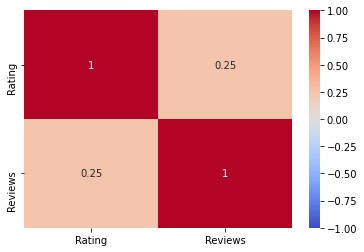

In [139]:
sns.heatmap(enter_game_free[["Rating","Reviews"]].corr(),cmap="coolwarm",annot=True, vmin=-1, vmax=1);

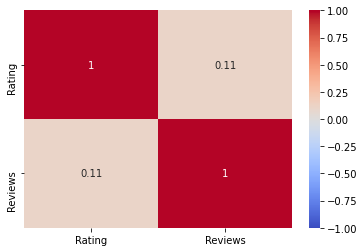

In [140]:
sns.heatmap(enter_game_paid[["Rating","Reviews"]].corr(),cmap="coolwarm",annot=True, vmin=-1, vmax=1);

###### Interpretation:
- The correlation between Rating & Reviews is weak, almost not existing, for each group. 
- But, it is interesting how in this particular group Free apps more correlated then Paid apps, although both are week.


### Hypothesis testing: comparing two groups Paid | Free

#### Rating 

#### t-test: testing difference across population

In [142]:
free_rev = pair_plot[pair_plot['Type'] == 'Free']['Rating']
paid_rev = pair_plot[pair_plot['Type'] == 'Paid']['Rating']
stats.ttest_ind(free_rev, paid_rev)  

Ttest_indResult(statistic=-3.9114149787966457, pvalue=9.242683098164484e-05)

##### Interpretation

- The P-Value is very small (negative), so we will reject the null hypothesis and conclude that there is a significant difference between the two sample means. 

#### Reviews

#### t-test: testing difference across population

In [143]:
free_rev = pair_plot[pair_plot['Type'] == 'Free']['Reviews']
paid_rev = pair_plot[pair_plot['Type'] == 'Paid']['Reviews']
stats.ttest_ind(free_rev, paid_rev)  

Ttest_indResult(statistic=14.577283139192245, pvalue=1.3510485080228278e-47)

##### Interpretation

- The P-Value is also very small (negative), so we will reject the null hypothesis and conclude that there is a significant difference between the two sample means.

### Hypothesis Testing dividing Paid | Free



 As confirmed 2 clear groups (Paid & Free Apps), we continue to anaysis them separately.

Before dividing the type we will add the categorical variables to the dataframe pair_plot

In [144]:
# adding category
incides_cat=playstore_clean["Category"].index
pair_plot["Category"]=playstore_clean["Category"].loc[incides_cat]

# adding genres
incides_gen=playstore_clean["Genres"].index
pair_plot["Genres"]=playstore_clean["Genres"].loc[incides_cat]

Now that we have the varibales, Creat dataset with only Free App and another with only Paid Apps

In [145]:
# Get dataset with only Free App
pair_plot_Free=pair_plot[pair_plot["Type"]=="Free"]

# Get dataset with only Paid App
pair_plot_Paid=pair_plot[pair_plot["Type"]=="Paid"]

#### Analysis Free App

#### Statistical Test: Anova

###### Prepare data for Anova Test

To be able to use Anova we need a Numerical Variable & Categorical variable - in this case we convert Rating to a categorical varible

In [146]:
# Check Rating
pair_plot["Rating"].value_counts()

1.386294    5798
1.609438    2550
1.098612     591
0.693147     107
0.000000      20
Name: Rating, dtype: int64

In [147]:
# Convert Rating to str
pair_plot["Rating_Cat"]=pair_plot["Rating"].astype(str) 

In [148]:
# Change rate num (str) to name to have a nicer column and more readable 

def Rating_Number_to_Name(x):
    m = {
        '1.3862943611198906': "Amazing",
        '1.6094379124341003': "Good",
        '1.0986122886681098': "Normal",
        '0.6931471805599453': "Bad",
        '0.0': "Horrible"
        }
    n = x.strip()
    out = m[n]
    return out

In [149]:
pair_plot["Rating_Cat"]=pair_plot["Rating_Cat"].apply(Rating_Number_to_Name)
pair_plot["Rating_Cat"]

0       Amazing
1       Amazing
2          Good
3          Good
4       Amazing
         ...   
9654       Good
9655       Good
9656    Amazing
9657       Good
9658       Good
Name: Rating_Cat, Length: 9066, dtype: object

In [150]:
# Add Rating_Cat to pair_plot_Free
pair_plot_Free=pair_plot[pair_plot["Type"]=="Free"]

###### Statistical Test: Anova of Rating <> Reviews


In [166]:
anova_df_free = pair_plot_Free[['Reviews', 'Rating_Cat']]

anova = smf.ols(formula='Reviews ~ C(Rating_Cat)', data=pair_plot_Free).fit()

print(anova.summary())

# We also check the mean and standard deviation for the groups
mean = anova_df_free.groupby("Rating_Cat").mean()
sd = anova_df_free.groupby("Rating_Cat").std()
print("\n MEAN:",mean)
print("\n SD:",sd)

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           9.29e-62
Time:                        01:25:36   Log-Likelihood:                -23408.
No. Observations:                8386   AIC:                         4.683e+04
Df Residuals:                    8381   BIC:                         4.686e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

###### Interpretation

- Anova helps us to determine if the differences are statistically significant.

     In this case there is a significant difference between the means of each group: Ratings <> Reviews, as we can see a small P-value (Prob F-statistic) of 9.29e-62 (versus 0.05).

So, we will use post-hoc tests with the help of the multicomp module, utilizing a Tukey Honestly Significant Difference (Tukey HSD) test, to check that difference between the means of each pair of groups.

###### Statistical Test: Tukeyhsd  of Rating <> Reviews

We can now see with Tukeyhsd what Rating (1,2,3,4 or 5) has the highest significance compared to the other. 

In [167]:
category_comparison = multi.MultiComparison(anova_df_free["Reviews"], anova_df_free["Rating_Cat"])
results = category_comparison.tukeyhsd()
print(results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 Amazing      Bad  -3.4977  0.001 -4.5841 -2.4113   True
 Amazing     Good   0.5487  0.001  0.2804   0.817   True
 Amazing Horrible  -6.2813  0.001 -8.8229 -3.7397   True
 Amazing   Normal  -1.9065  0.001 -2.3886 -1.4244   True
     Bad     Good   4.0464  0.001  2.9466  5.1462   True
     Bad Horrible  -2.7836 0.0464   -5.54 -0.0272   True
     Bad   Normal   1.5912  0.002  0.4207  2.7617   True
    Good Horrible    -6.83  0.001 -9.3774 -4.2826   True
    Good   Normal  -2.4552  0.001 -2.9668 -1.9436   True
Horrible   Normal   4.3748  0.001  1.7961  6.9535   True
--------------------------------------------------------


/usr/local/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


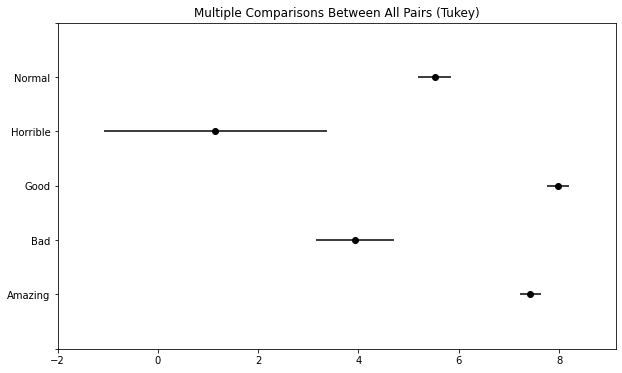

In [168]:
# graph tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=anova_df_free["Reviews"],     
                          groups=anova_df_free["Rating_Cat"],   
                          alpha=0.05)          # Significance level

# confidence intervals
tukey.plot_simultaneous()   
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="b");

###### Interpretation

-  there is a significant difference between the means of each group within them all

#### Probability free app

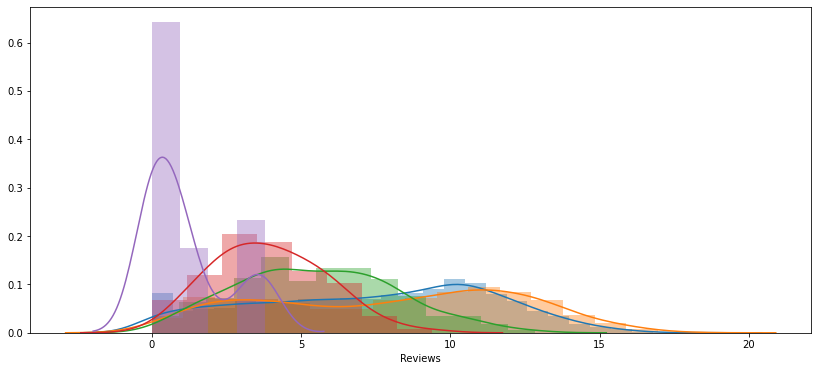

In [155]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.distplot(anova_df_free[anova_df_free["Rating_Cat"]=="Amazing"]["Reviews"], ax=ax)
sns.distplot(anova_df_free[anova_df_free["Rating_Cat"]=="Good"]["Reviews"], ax=ax)
sns.distplot(anova_df_free[anova_df_free["Rating_Cat"]=="Normal"]["Reviews"], ax=ax)
sns.distplot(anova_df_free[anova_df_free["Rating_Cat"]=="Bad"]["Reviews"],ax=ax)
sns.distplot(anova_df_free[anova_df_free["Rating_Cat"]=="Horrible"]["Reviews"], ax=ax);

#### Analysis Paid  App


#### Statistical Test: Anova

###### Prepare data for Anova Test

In [156]:
# Add Rating_Cat to pair_plot_Free
pair_plot_Paid=pair_plot[pair_plot["Type"]=="Paid"]

###### Statistical Test: Anova of Rating <> Reviews

In [157]:
anova_df_paid = pair_plot_Paid[['Reviews', 'Rating_Cat']]

anova = smf.ols(formula='Reviews ~ C(Rating_Cat)', data=pair_plot_Paid).fit()

print(anova.summary())

# We also check the mean and standard deviation
mean = anova_df_paid.groupby("Rating_Cat").mean()
sd = anova_df_paid.groupby("Rating_Cat").std()

print("\n MEAN:",mean)
print("\n SD:",sd)

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.32
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.12e-09
Time:                        01:25:11   Log-Likelihood:                -1703.2
No. Observations:                 680   AIC:                             3416.
Df Residuals:                     675   BIC:                             3439.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

###### Interpretation

In this case, for Paid Apps, we also have a significant relationship between Ratings <> Reviews, as we can see a small P-value (Prob F-statistic) of 1.12e-09 (versus 0.05), thought the relation is less significant compared to Free Apps.


In this case, for Paid Apps, there is a significant difference between the means of each group: Ratings <> Reviews, as we can see a small P-value (Prob F-statistic) of 1.12e-09 (versus 0.05), thought less significant compared to Free Apps.

So, we will also use post-hoc test to check that difference between the means of each pair of groups.

##### Statistical Test: Tukeyhsd  of Rating <> Reviews

We can also see now with Tukeyhsd what Rating (1,2,3,4 or 5) has the highest significance compared to the other. 

In [158]:
category_comparison = multi.MultiComparison(anova_df_paid["Reviews"], anova_df_paid["Rating_Cat"])
results = category_comparison.tukeyhsd()
print(results)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
 Amazing      Bad  -1.1746 0.8175  -4.2768  1.9276  False
 Amazing     Good   1.2579  0.001   0.6003  1.9155   True
 Amazing Horrible   -4.721 0.1665 -10.4858  1.0437  False
 Amazing   Normal  -1.2508 0.0748  -2.5752  0.0736  False
     Bad     Good   2.4325 0.2057  -0.6813  5.5464  False
     Bad Horrible  -3.5464 0.5612 -10.0652  2.9725  False
     Bad   Normal  -0.0761    0.9  -3.3954  3.2431  False
    Good Horrible  -5.9789 0.0381 -11.7499 -0.2079   True
    Good   Normal  -2.5087  0.001    -3.86 -1.1573   True
Horrible   Normal   3.4703 0.4897  -2.4141  9.3547  False
---------------------------------------------------------


/usr/local/lib/python3.7/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


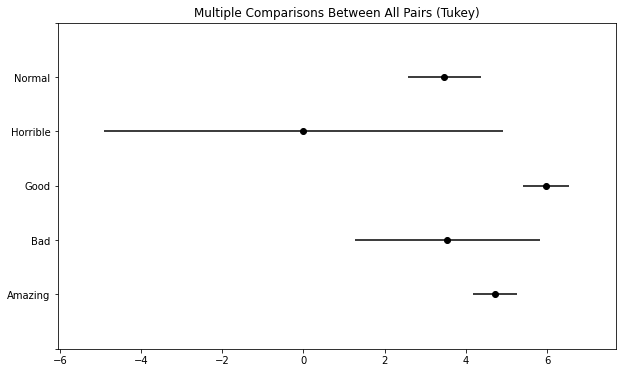

In [159]:
# graph tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=anova_df_paid["Reviews"],     
                          groups=anova_df_paid["Rating_Cat"],   
                          alpha=0.05)          # Significance level

# confidence intervals
tukey.plot_simultaneous()   
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="b");

To understand the above test we know that:
    - ds & sample(n) affect the confidence interval and makes it more or less wider.
    - media affect the confidence interval moving it right or left
    - We can see that sample size is affecting out test results.

In [174]:
#Sample size of Paid apps

horrible= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Horrible"]["Reviews"]).count()
bad= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Bad"]["Reviews"]).count()
normal= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Normal"]["Reviews"]).count()
good= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Good"]["Reviews"]).count()
amazing= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Amazing"]["Reviews"]).count()


print("horrible:", horrible)
print("bad:", bad)
print("normal:", normal)
print("good:", good)
print("amazing:", amazing)

horrible: 2
bad: 7
normal: 42
good: 262
amazing: 367


In [175]:
# desviación típica of Paid apps

horrible= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Horrible"]["Reviews"]).std()
bad= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Bad"]["Reviews"]).std()
normal= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Normal"]["Reviews"]).std()
good= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Good"]["Reviews"]).std()
amazing= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Amazing"]["Reviews"]).std()


print("horrible:", horrible)
print("bad:", bad)
print("normal:", normal)
print("good:", good)
print("amazing:", amazing)

horrible: 0.0
bad: 1.053755998734219
normal: 1.5139783252135153
good: 3.2140789353592205
amazing: 2.9418441248001646


In [176]:
#media mostral (afecta al intervalo confianza (al valor)) of Paid apps

horrible= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Horrible"]["Reviews"]).mean()
bad= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Bad"]["Reviews"]).mean()
normal= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Normal"]["Reviews"]).mean()
good= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Good"]["Reviews"]).mean()
amazing= (anova_df_paid[anova_df_paid["Rating_Cat"]=="Amazing"]["Reviews"]).mean()


print("horrible:", horrible)
print("bad:", bad)
print("normal:", normal)
print("good:", good)
print("amazing:", amazing)

horrible: 0.0
bad: 3.5463684349228006
normal: 3.470252723903533
good: 5.978911005149748
amazing: 4.721009695876575


#### Probability free app

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


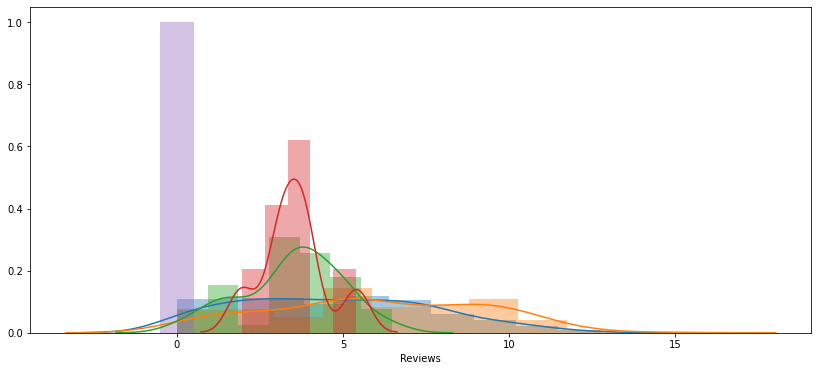

In [164]:
#distribución discreta (pq estan en un rango definido)
#mide probabilidad

fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.distplot(anova_df_paid[anova_df_paid["Rating_Cat"]=="Amazing"]["Reviews"])
sns.distplot(anova_df_paid[anova_df_paid["Rating_Cat"]=="Good"]["Reviews"])
sns.distplot(anova_df_paid[anova_df_paid["Rating_Cat"]=="Normal"]["Reviews"])
sns.distplot(anova_df_paid[anova_df_paid["Rating_Cat"]=="Bad"]["Reviews"])
sns.distplot(anova_df_paid[anova_df_paid["Rating_Cat"]=="Horrible"]["Reviews"]);

# prob de que haya "0 review" si el rating=1 (real)
# prob de que hayan "4 review" si me ponen un rating=3 (ejemplo)

# Final-Conclusion


- Free App have more installs
- Free Apps have more reviews
- The lower & highest ratings are given to Paid Apps. Average rating are given to Free Apps. 
- The most expensive app are from finance, family and lifestyle categories
- Games Apps are the ones with +reviews & +installments that have a rating above 4.
- The Category with more apps in the market is Family, then Games and Tools
- In the Game category, the most popular Genres is Action.
- Communication is the App with +reviews & +installments




- Correlation between Rating & Reviews is weak, almost not existing. So with more reviews we won't get to better ratings. But, it is interesting how in this particular group Free apps more correlated then Paid apps, although both are week.
- There is a significant difference between the sample means of Paid & Free App regarding Rating and also Reviews
- There is a significant difference between the means of each rating group (1,2,3,4,5) <> Reviews. Although less signicifacnt for paid apps

### "If I would launch an App, what king of App should I go for if it is important to me to have +positives reviews?"
    
- Category: Game
- Genre: Action
- Type: Free
- ->in order to have +installs & +reviews & averange rating rather than extrem rating<-